# Magnetic Poles
## drift between 2010-01-01 and 2020-01-01

The calucation uses the Fortran libraty of Emmert et al.[2010[1] and wrapped by the [apexpy](https://apexpy.readthedocs.io/en/latest/readme.html) Python package.

[1] Emmert, J. T., A. D. Richmond, and D. P. Drob (2010),
       A computationally compact representation of Magnetic-Apex
       and Quasi-Dipole coordinates with smooth base vectors,
       J. Geophys. Res., 115(A8), A08322,
       [doi:10.1029/2010JA015326](http://dx.doi.org/10.1029/2010JA015326)

In [1]:
from apexpy import Apex

def qd2geo(time, qdlat, qdlon, height=0, precision=1e-5):
    """ Get geographic coordinates for the given QD coordinates. """
    apex = Apex(time)
    lat, lon, error = apex.qd2geo(qdlat, qdlon, height, precision)
    if error > precision:
        raise RuntimeError(
            "The result precision %gdeg is not within the required limit %gdeg!"
            "" % (error, precision)
        )
    return lat, lon

In [2]:
from datetime import datetime
from itertools import product

start_year = 2010
end_year = 2020

times = [datetime(year, 1, 1) for year in range(start_year, end_year + 1)]

In [3]:
magnetic_poles = [
    (time, qd2geo(time, 90, 0), qd2geo(time, -90, 0))
    for time in times
]

In [4]:
from pandas import DataFrame
DataFrame([
    (t, nmp[0], nmp[1], smp[0], smp[1])
    for t, nmp, smp in magnetic_poles
], columns = ("date", "northMagPoleLat", "northMagPoleLon", "southMagPoleLat", "southPoleLon"))
#DataFrame(magnetic_poles, columns=("date", "north_magnetic_pole", "south_magnetic_pole"))

,date,northMagPoleLat,northMagPoleLon,southMagPoleLat,southPoleLon
0,2010-01-01,82.627205,-83.919785,-74.283615,126.011719
1,2011-01-01,82.716835,-84.043762,-74.303459,125.956863
2,2012-01-01,82.806381,-84.168839,-74.323334,125.902046
3,2013-01-01,82.895844,-84.295052,-74.343239,125.847267
4,2014-01-01,82.985222,-84.422462,-74.363159,125.792534
5,2015-01-01,83.074516,-84.551102,-74.383118,125.737839
6,2016-01-01,83.158089,-84.696404,-74.400307,125.661491
7,2017-01-01,83.241623,-84.842804,-74.417557,125.585182
8,2018-01-01,83.325127,-84.990356,-74.434868,125.508926
9,2019-01-01,83.408600,-85.139091,-74.452225,125.432732


In [5]:
from matplotlib import pyplot as plt
#from cartopy import crs
from mpl_toolkits.basemap import Basemap
from numpy import arange, asarray

lats_nmp = asarray([v for _, (v, _), _ in magnetic_poles])
lons_nmp = asarray([v for _, (_, v), _ in magnetic_poles])
lats_smp = asarray([v for _, _, (v, _) in magnetic_poles])
lons_smp = asarray([v for _, _, (_, v) in magnetic_poles])

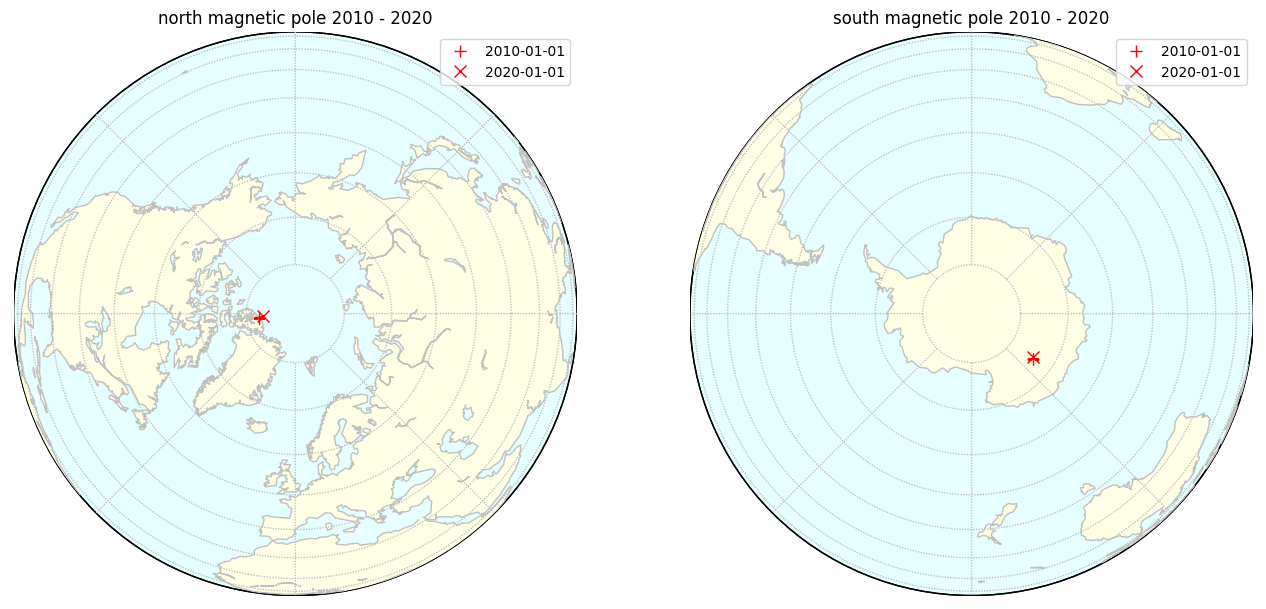

In [7]:
fig=plt.figure(figsize=(16, 16), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(121)
plt.title("north magnetic pole 2010 - 2020")
map = Basemap(projection='ortho', lon_0=0, lat_0=90)
map.drawcoastlines(color="silver")
map.fillcontinents(color=(1.0, 1.0, 0.9), lake_color=(0.9, 1.0, 1.0))
map.drawmapboundary(fill_color=(0.9, 1.0, 1.0))
map.drawmeridians([-135, -90, -45, 0, 45, 90, 135, 180], color="silver")
map.drawparallels([10, 20, 30, 40, 50, 60, 70], color="silver")
map.plot(lons_nmp, lats_nmp, 'r-', latlon=True)
h1, = map.plot(lons_nmp[0], lats_nmp[0], 'r+', latlon=True, markersize=8)
h2, = map.plot(lons_nmp[-1], lats_nmp[-1], 'rx', latlon=True, markersize=8)
plt.legend((h1, h2), (times[0].date(), times[-1].date()), loc=1)

plt.subplot(122)
plt.title("south magnetic pole 2010 - 2020")
map = Basemap(projection='ortho', lon_0=0, lat_0=-90)
map.drawcoastlines(color="silver")
map.fillcontinents(color=(1.0, 1.0, 0.9), lake_color=(0.9, 1.0, 1.0))
map.drawmapboundary(fill_color=(0.9, 1.0, 1.0))
map.drawmeridians([-135, -90, -45, 0, 45, 90, 135, 180], color="silver")
map.drawparallels([-70, -60, -50, -40, -30, -20, -10], color="silver")
map.plot(lons_smp, lats_smp, 'r-', latlon=True)
map.plot(lons_smp[0], lats_smp[0], 'r+', latlon=True, markersize=8)
map.plot(lons_smp[-1], lats_smp[-1], 'rx', latlon=True, markersize=8)
plt.legend((h1, h2), (times[0].date(), times[-1].date()), loc=1)

plt.show()